In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import pairwise_distances
from sklearn.mixture import BayesianGaussianMixture
import random
import torch

In [ ]:
# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
embeddings = np.load('/content/drive/MyDrive/new_const_test/mouse1_2_3f_test_GAT2_GMM1_450_4_1_std_0.005_dim_60.npy')
# embeddings = np.array(embeddings[:,0,:])

In [ ]:
num_clusters = 6

kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(embeddings)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.predict(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
gmm = BayesianGaussianMixture(n_components=num_clusters, random_state=42)
gmm.fit(embeddings)

cluster_centers = gmm.means_
cluster_labels = gmm.predict(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


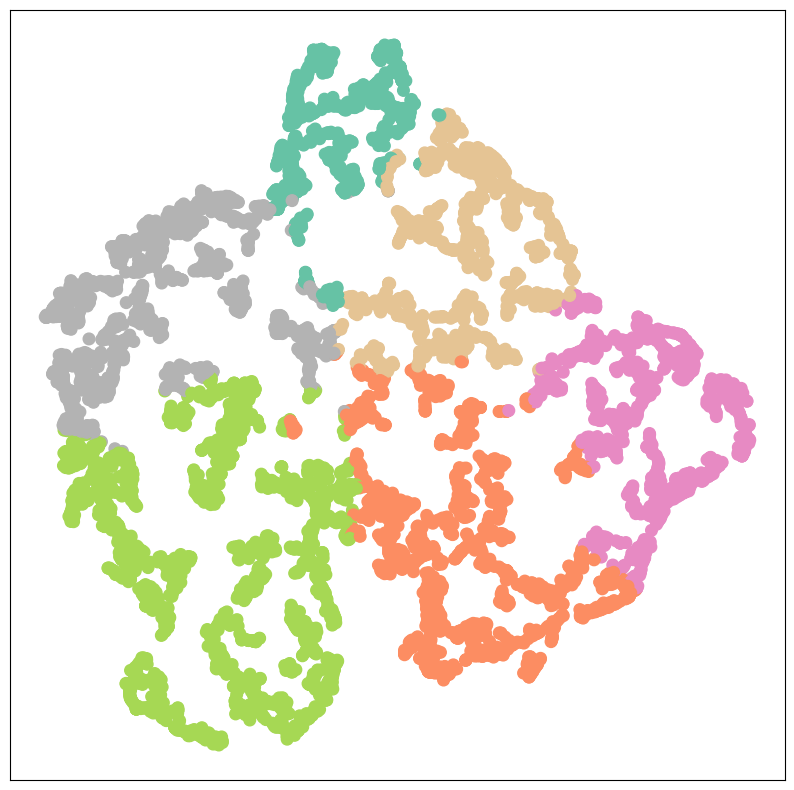

In [ ]:
visualize(torch.tensor(embeddings), color=cluster_labels)

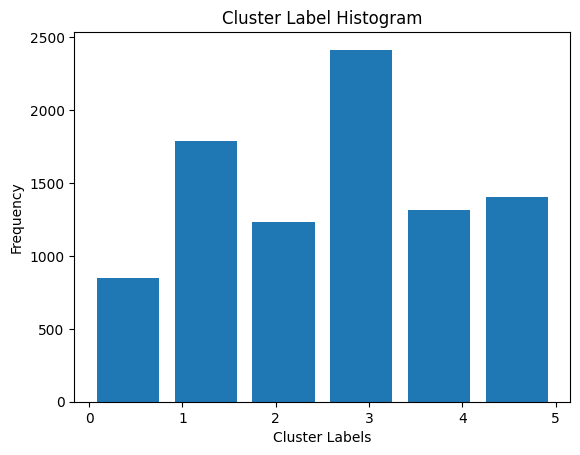

In [ ]:
import matplotlib.pyplot as plt

plt.hist(cluster_labels, bins=num_clusters, rwidth=0.8)
plt.title('Cluster Label Histogram')
plt.xlabel('Cluster Labels')
plt.ylabel('Frequency')
plt.show()

In [ ]:
frame_num = 90103
idx_list = range(31, frame_num-30, 10)

sample_indexes_matrix = []

for i in range(num_clusters):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    distances = pairwise_distances([cluster_centers[i]], embeddings[cluster_indices])

    closest_sample_indexes = [cluster_indices[idx] for idx in np.argsort(distances[0])[:100]]

    random_samples = []
    selected_indexes = set()

    while len(random_samples) < 6:
        idx = random.choice(closest_sample_indexes)
        if all(abs(idx - s) >= 3 for s in selected_indexes):
            random_samples.append(idx)
            selected_indexes.add(idx)

    sample_indexes_matrix.append(random_samples)

sample_indexes_matrix = np.array(sample_indexes_matrix)


In [ ]:
st_frame_idxs = np.empty((8,6))

for cl in range(8):
  for smpl in range(6):
    st_frame_idxs[cl,smpl] = idx_list[sample_indexes_matrix[cl,smpl]]-60


IndexError: index 6 is out of bounds for axis 0 with size 6

In [ ]:
file_path = "smpl_frame_idxs.csv"

# Save the NumPy array as a CSV file
np.savetxt(file_path, st_frame_idxs, delimiter=',', fmt='%d')

In [ ]:
!pip install prettycm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 30.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.10.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


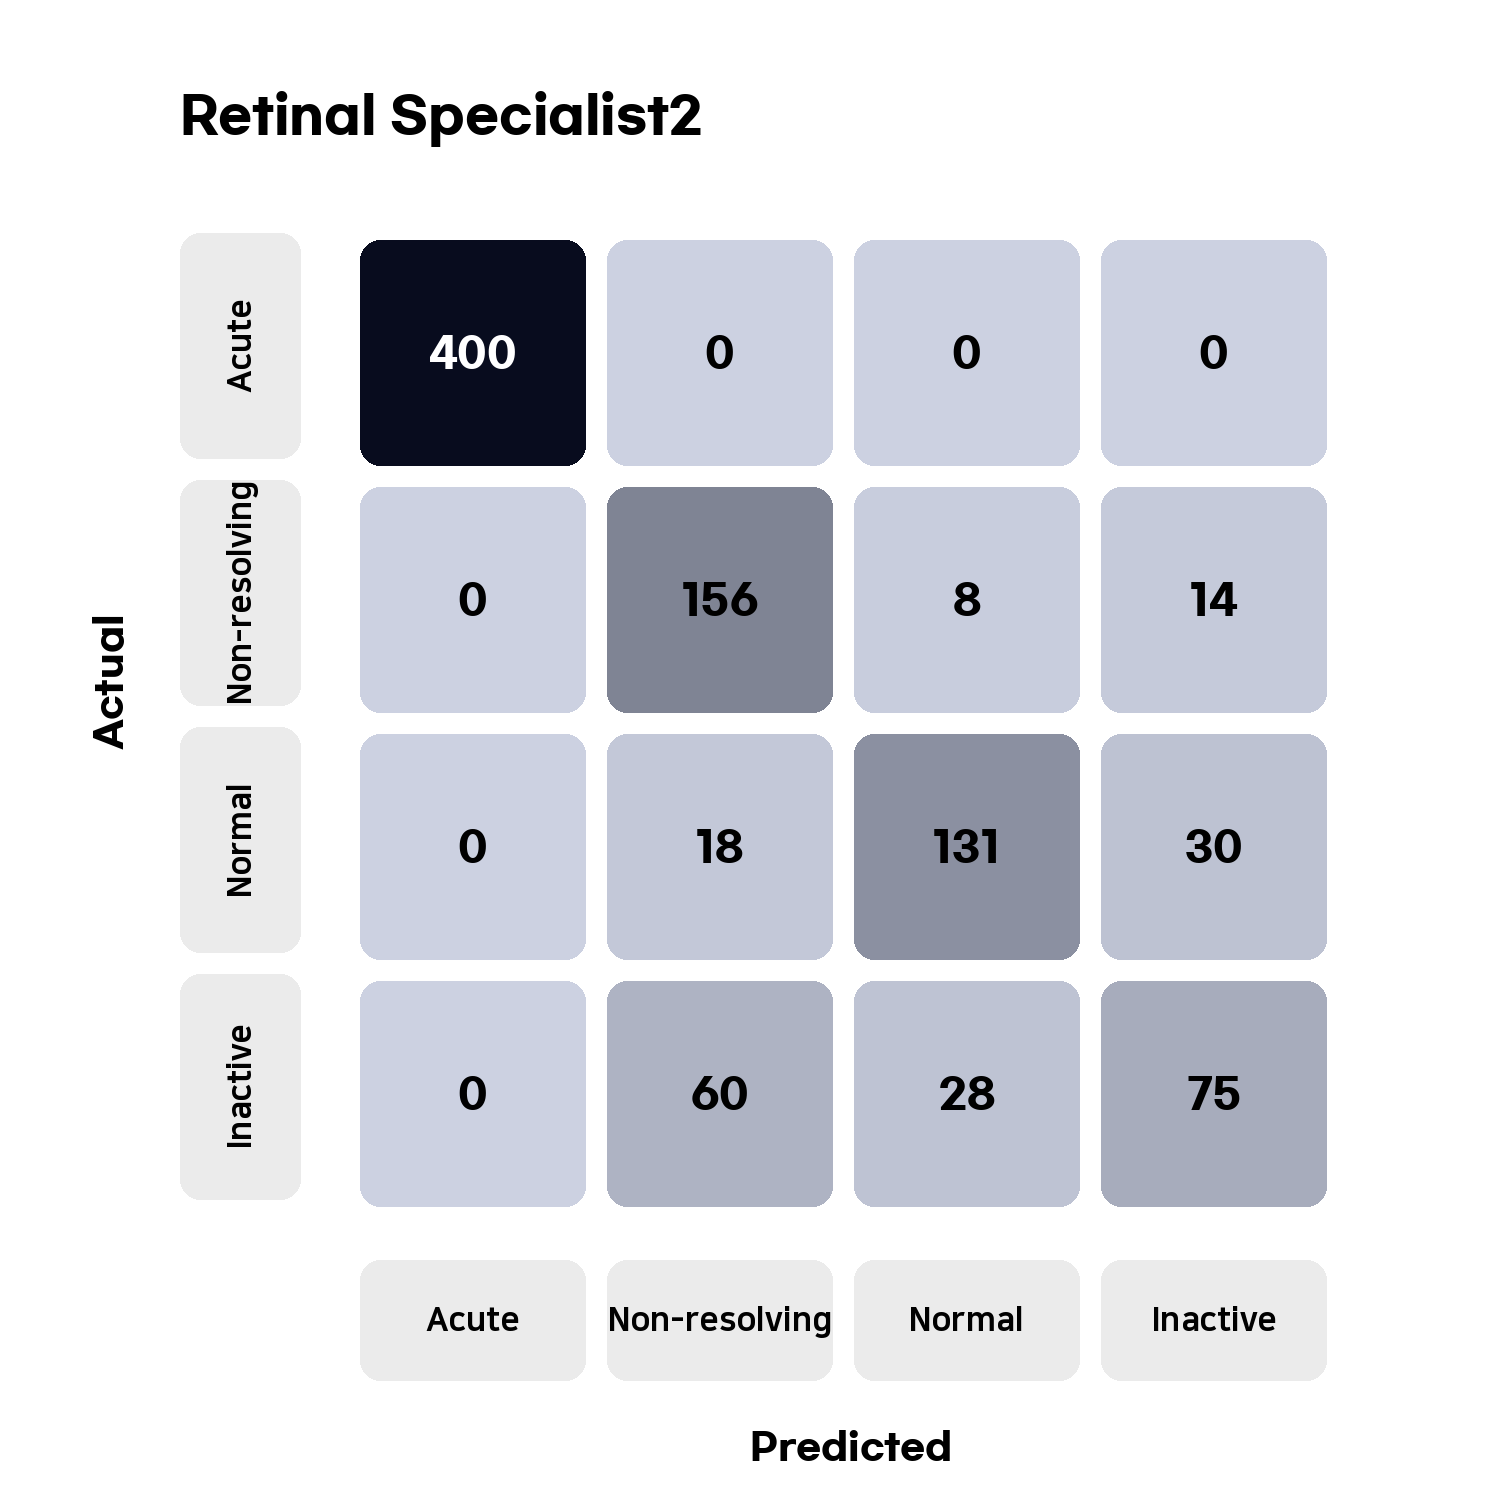

In [ ]:
from prettycm import confusion_matrix
from prettycm import palette

# Define confusion matrix
cm = confusion_matrix([[400,0,0,0],[0,156,8,14],[0,18,131,30],[0,60,28,75]])
cm.set_classname(["Acute", "Non-resolving","Normal","Inactive"])
cm.set_title("Retinal Specialist2")

# Define Palette and draw
pset = palette()
pset.draw(cm, "place_to_save.png")

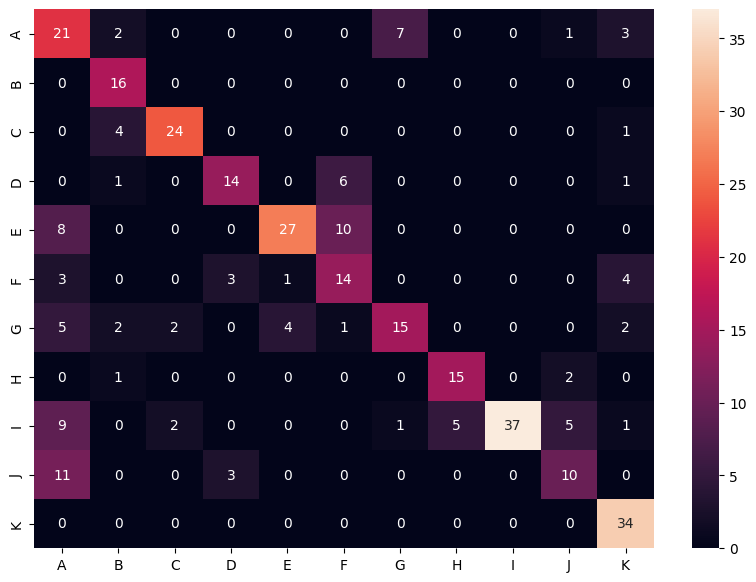

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[21,2,0,0,0,0,7,0,0,1,3],
        [0,16,0,0,0,0,0,0,0,0,0],
        [0,4,24,0,0,0,0,0,0,0,1],
        [0,1,0,14,0,6,0,0,0,0,1],
        [8,0,0,0,27,10,0,0,0,0,0],
        [3,0,0,3,1,14,0,0,0,0,4],
        [5,2,2,0,4,1,15,0,0,0,2],
        [0,1,0,0,0,0,0,15,0,2,0],
        [9,0,2,0,0,0,1,5,37,5,1],
        [11,0,0,3,0,0,0,0,0,10,0],
        [0,0,0,0,0,0,0,0,0,0,34]]
df_cm = pd.DataFrame(array, index = [i for i in "ABCDEFGHIJK"],
                  columns = [i for i in "ABCDEFGHIJK"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
cm = array

In [ ]:
true_pos = np.diag(cm)
false_pos = np.sum(cm, axis=0) - true_pos
false_neg = np.sum(cm, axis=1) - true_pos

precision = np.sum(true_pos / (true_pos + false_pos))
recall = np.sum(true_pos / (true_pos + false_neg))

In [ ]:
true_pos = np.diag(cm)
precision = np.sum(true_pos / np.sum(cm, axis=0))
recall = np.sum(true_pos / np.sum(cm, axis=1))

In [ ]:
print('precision: ',precision*10)
print('recall: ',recall*10)

precision:  75.33171331766499
recall:  75.9213453649232
